In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data= pd.read_csv('creditcard.csv')

In [59]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [60]:
print(data.shape)

(284807, 31)


In [61]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -

In [62]:
#reshaping data, to save time just taking a fraction of the data
data= data.sample(frac= 0.5 ,random_state=1 )
print(data.shape)

(142404, 31)


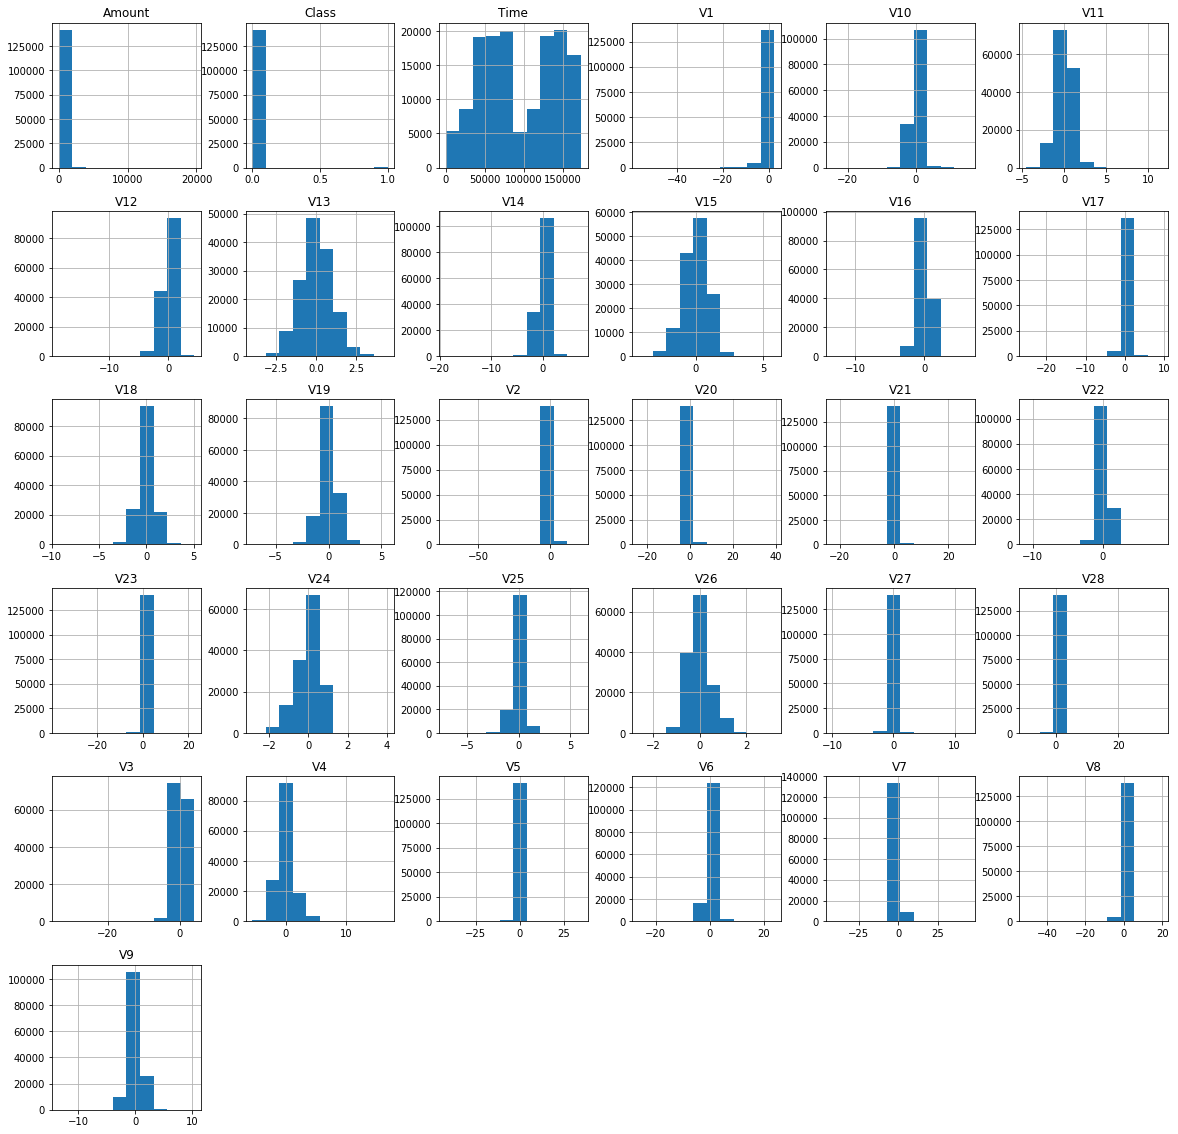

In [63]:
data.hist(figsize= (20,20))
plt.show()

In [64]:
Fraud= data[data['Class']==1]
Valid= data[data['Class']==0]

Outlier_Fraction= len(Fraud)/len(Valid)
print(Outlier_Fraction)

print('Valid Cases:{}'.format(len(Valid)))
print('Fraud Cases:{}'.format(len(Fraud)))

0.0015966014193575613
Valid Cases:142177
Fraud Cases:227


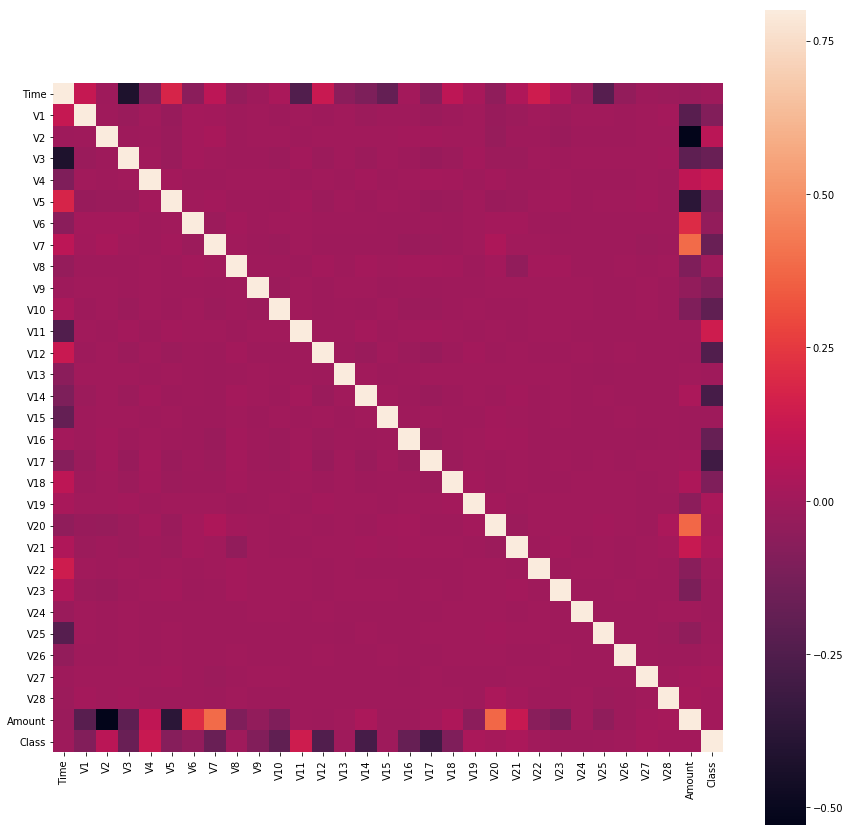

In [65]:
#lets check correlation matrix
corrl= data.corr()
fig= plt.figure(figsize=(15,15))

sns.heatmap(corrl, vmax=0.8 ,square=True)
plt.show()

In [66]:
#getting all the columns from the dataframe
columns= data.columns.tolist()

#filtering the data that is not relevent to data
columns=[c for c in columns if c not in ['Class']]

#storing the variable that we will be predicting on
target = 'Class'

X= data[columns]
Y= data[target]

print(X.shape)
print(Y.shape)

(142404, 30)
(142404,)


In [67]:
#lets apply our kNN algo
from sklearn import neighbors,datasets,cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test= cross_validation.train_test_split(X,Y, test_size=0.2)

In [68]:
for k in range(10):
    K_value = k+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, Y_train) 
    Y_pred = neigh.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred)*100,"% for K-Value:",K_value)

Accuracy is  99.7893332397 % for K-Value: 1
Accuracy is  99.8209332537 % for K-Value: 2
Accuracy is  99.8139110284 % for K-Value: 3
Accuracy is  99.8209332537 % for K-Value: 4
Accuracy is  99.8209332537 % for K-Value: 5
Accuracy is  99.8209332537 % for K-Value: 6
Accuracy is  99.8209332537 % for K-Value: 7
Accuracy is  99.8209332537 % for K-Value: 8
Accuracy is  99.8209332537 % for K-Value: 9
Accuracy is  99.8209332537 % for K-Value: 10
